In [23]:

using Plots
include("numerical_integration.jl")
 
NUM_STEPS=500

function logistic_growth(x,p)
    r,K = p

    x = x[1]
    println(x)
    dx_dt = r*x*(1-(x/K))
    println(dx_dt)
    return dx_dt
end

function SIR(x,p)
    #unpack vector
    β,γ= p 
    S,I,R = x
    N = S+I+R
    #calculate differenitals
    dS = -(β*S*I)/N
    dI = (β*S*I)/N - γ*I
    dR = γ*I
    
    dX = [dS dI dR]#pack differentials into an array
    return dX
end



SIR (generic function with 1 method)

In [24]:
#SIR MODEL with 
x_0 = [.1 ]
p = [1.2,500]
max_time = 500
num_steps = 500 

time_range,SIR_results = ODESolver(logistic_growth,x_0,p,max_time,num_steps,eulers_method)
sir_matrix = vcat(SIR_results...)
X = sir_matrix[:,1],sir_matrix[:,2]



plot(time_range,[X],labels = ['X'],title = "Lotka Volterra Numerical Integration with Heun's Method")

0.1
0.119976


LoadError: MethodError: no method matching +(::Vector{Float64}, ::Float64)
For element-wise addition, use broadcasting with dot syntax: array .+ scalar
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:591
[0m  +([91m::T[39m, ::T) where T<:Union{Float16, Float32, Float64} at float.jl:383
[0m  +([91m::GeometryBasics.HyperRectangle{N, T}[39m, ::Number) where {N, T} at ~/.julia/packages/GeometryBasics/5Sb5M/src/primitives/rectangles.jl:267
[0m  ...

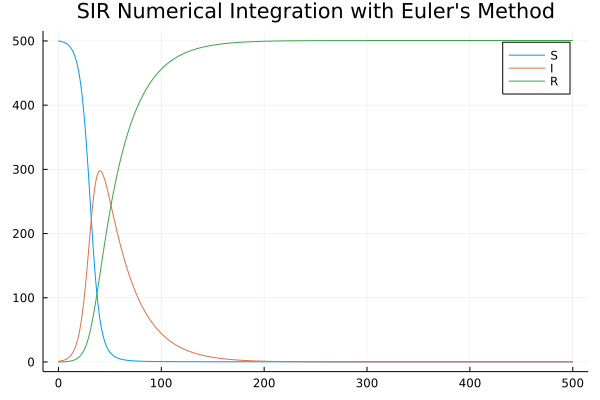

In [12]:
#SIR MODEL with 
x_0 = [500 1 0]
p = [1/2,1/14]
max_time = 250 
num_steps = NUM_STEPS

time_range,SIR_results = ODESolver(SIR,x_0,p,max_time,num_steps,eulers_method)
sir_matrix = vcat(SIR_results...)
s,i,r = sir_matrix[:,1],sir_matrix[:,2],sir_matrix[:,3]



plot(time_range,[s,i,r],labels = ['S' 'I' 'R'],title = "SIR Numerical Integration with Euler's Method")
##savefig("plots/sir_euler.png")

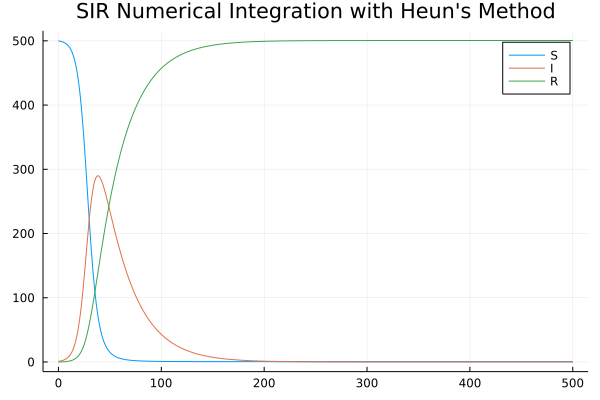

In [3]:
#SIR MODEL with 
x_0 = [500 1 0]
p = [1/2,1/14]
max_time = 250 
num_steps = NUM_STEPS 

time_range,SIR_results = ODESolver(SIR,x_0,p,max_time,num_steps,heuns_method)
sir_matrix = vcat(SIR_results...)
s,i,r = sir_matrix[:,1],sir_matrix[:,2],sir_matrix[:,3]



plot(time_range,[s,i,r],labels = ['S' 'I' 'R'],title = "SIR Numerical Integration with Heun's Method")
#savefig("plots/sir_heun.png")

In [14]:
function lorenz(x,p)
    ρ,σ,β= p
    X,Y,Z = x
    dX = σ*(Y-X)
    dY = X*(ρ-Z)-Y
    dZ = (X*Y)-(β*Z)

    return_x = [dX dY dZ]

    return return_x
end

    


lorenz (generic function with 1 method)

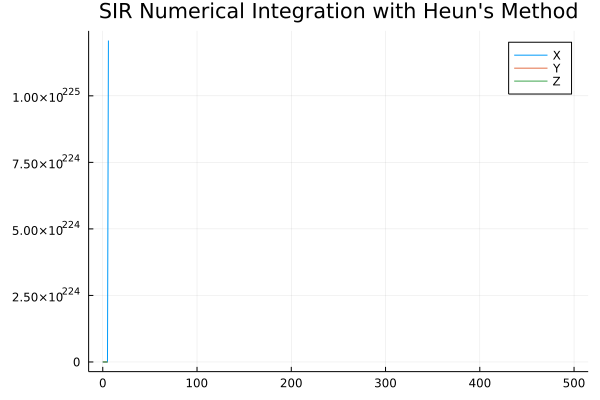

In [15]:
#SIR MODEL with 
x_0 = [1 0.5 0.5]
p = [28,10,8/3]
max_time = 500
num_steps = 500

time_range,SIR_results = ODESolver(lorenz,x_0,p,max_time,num_steps,heuns_method)
sir_matrix = vcat(SIR_results...)
s,i,r = sir_matrix[:,1],sir_matrix[:,2],sir_matrix[:,3]
plot(time_range,[s,i,r],labels = ['X' 'Y' 'Z'],title = "SIR Numerical Integration with Heun's Method")

In [16]:
# using DifferentialEquations, Plots
# function lorenz!(du,u,p,t)
#     du[1] = 10.0*(u[2]-u[1])
#     du[2] = u[1]*(28.0-u[3]) - u[2]
#     du[3] = u[1]*u[2] - (8/3)*u[3]
# end
# u0 = [1.0;0.0;0.0]
# tspan = (0.0,100.0)
# prob = ODEProblem(lorenz!,u0,tspan)
# sol = solve(prob)
# plot(sol,vars=(1,2,3))

In [17]:
function lotka_volterra(x,p)
    α,β,δ,γ= p
    X,Y = x
    dX = α*X-β*X*Y
    dY = δ*X*Y-γ*Y 

    return_x = [dX dY]

    return return_x
end

lotka_volterra (generic function with 1 method)

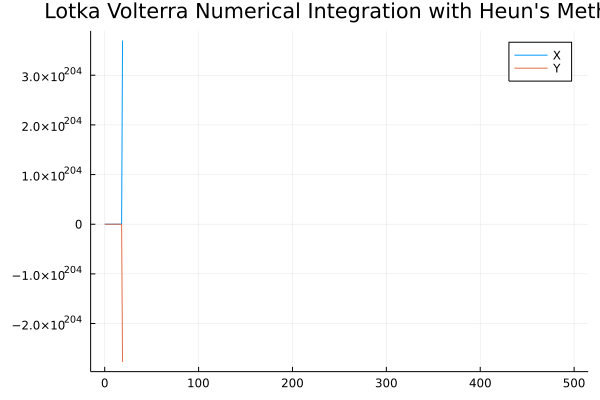

In [18]:
#SIR MODEL with 
x_0 = [.9 .9]
p = [2/3,4/3,1,1]
max_time = 500
num_steps = 500 

time_range,SIR_results = ODESolver(lotka_volterra,x_0,p,max_time,num_steps,eulers_method)
sir_matrix = vcat(SIR_results...)
X,Y = sir_matrix[:,1],sir_matrix[:,2]



plot(time_range,[X,Y],labels = ['X' 'Y' ],title = "Lotka Volterra Numerical Integration with Heun's Method")